# WeRateDogs Twitter Data Wrangling  Project

## Gather

In [111]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests 
import os
import json
from bs4 import BeautifulSoup
%matplotlib inline

In [112]:
pd.options.mode.chained_assignment = None

In [113]:
# Creating folder for our dataset on local system if it doesn't exist

folder_name = 'datasets'

if not os.path.exists(folder_name):
  os.makedirs(folder_name)

In [114]:
# Downloading dataset files from url into our local machine

url_image = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
url_archive = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'

r_image = requests.get(url_image)
r_archive = requests.get(url_archive)

with open ('datasets/image_predictions.tsv', 'wb') as file:
  file.write(r_image.content)

with open ('datasets/twitter-archive-enhanced.csv', 'wb') as file:
  file.write(r_archive.content)

In [115]:
# Opening the tweet-json text dataset file and reading it line by line 

with open('datasets/tweet-json.txt') as file:
  tweets = []

  for line in file:
    tw = json.loads(line)
    # Appending a dictionary of selected features into the 'tweets' list 
    tweets.append({
        'tweet_id': tw['id'],
        'retweet_count':tw['retweet_count'],
        'favorite_count':tw['favorite_count']
    })

In [116]:
# Reading the csv,tsv and json files into pandas dataframes

df_image = pd.read_csv('datasets/image_predictions.tsv', sep='\t')
df_archive = pd.read_csv('datasets/twitter-archive-enhanced.csv')
df_tweets= pd.DataFrame(tweets)

## Assessment

In [117]:
# Visual assessment of twitter archive dataframe

df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
713,784183165795655680,NaN,NaN,2016-10-07 00:06:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Reginald. He's one magical puppo. Aero...,NaN,NaN,NaN,https://vine.co/v/5ghHLBMMdlV,12,10,Reginald,None,None,None,puppo
259,843235543001513987,NaN,NaN,2017-03-18 22:59:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tycho. She just had new wheels install...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843235543...,13,10,Tycho,None,None,None,None
654,791821351946420224,NaN,NaN,2016-10-28 01:58:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This little fella really hates ...,6.848310e+17,4.196984e+09,2016-01-06 20:16:44 +0000,"https://vine.co/v/eEZXZI1rqxX,https://vine.co/...",13,10,None,None,None,pupper,None
2277,667437278097252352,NaN,NaN,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667437278...,10,10,None,None,None,None,None
1409,699060279947165696,NaN,NaN,2016-02-15 02:38:53 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Yukon. He pukes rainbows. 12/10 magica...,NaN,NaN,NaN,https://vine.co/v/inlmMHxtqDD,12,10,Yukon,None,None,None,None
640,793241302385262592,NaN,NaN,2016-11-01 00:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's out here bustin h*ckin gh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793241302...,13,10,Tucker,None,None,None,None
343,832040443403784192,NaN,NaN,2017-02-16 01:34:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Klein. These pics were ...,7.699404e+17,4.196984e+09,2016-08-28 16:51:16 +0000,https://twitter.com/dog_rates/status/769940425...,12,10,Klein,None,None,None,None
2245,667885044254572545,NaN,NaN,2015-11-21 01:59:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stu. Stu has stacks on stacks and an eye ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667885044...,10,10,Stu,None,None,None,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,None,None
534,807106840509214720,NaN,NaN,2016-12-09 06:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None


In [118]:
# Visual assessment of image prediction dataframe

df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1125,727314416056803329,https://pbs.twimg.com/media/Chfwmd9U4AQTf1b.jpg,2,toy_poodle,0.827469,True,miniature_poodle,0.160760,True,Tibetan_terrier,0.001731,True
93,667549055577362432,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1,electric_fan,0.984377,False,spotlight,0.007737,False,lampshade,0.001901,False
549,677530072887205888,https://pbs.twimg.com/media/CWcSAI-WUAAOB9W.jpg,1,Staffordshire_bullterrier,0.689259,True,Norwegian_elkhound,0.026121,True,American_Staffordshire_terrier,0.023075,True
691,684200372118904832,https://pbs.twimg.com/media/CX7EkuHWkAESLZk.jpg,1,llama,0.681347,False,ram,0.120142,False,hog,0.043686,False
1975,870063196459192321,https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg,1,comic_book,0.534409,False,envelope,0.280722,False,book_jacket,0.043785,False
1043,712668654853337088,https://pbs.twimg.com/media/CePoVTyWsAQEz1g.jpg,1,Labrador_retriever,0.829058,True,golden_retriever,0.038664,True,Chihuahua,0.026221,True
26,666373753744588802,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,1,soft-coated_wheaten_terrier,0.326467,True,Afghan_hound,0.259551,True,briard,0.206803,True
819,692905862751522816,https://pbs.twimg.com/media/CZ2yNKhWEAA_7cb.jpg,1,Mexican_hairless,0.162638,True,Doberman,0.156287,True,Rhodesian_ridgeback,0.081478,True
862,697255105972801536,https://pbs.twimg.com/media/Ca0lzzmWwAA5u56.jpg,1,Great_Dane,0.173989,True,malinois,0.165888,True,Doberman,0.119890,True
1419,771500966810099713,https://pbs.twimg.com/media/CrTsCPHWYAANdzC.jpg,1,Labrador_retriever,0.833952,True,golden_retriever,0.103223,True,soccer_ball,0.012094,False


In [119]:
# Visual assessment of tweet-json dataframe

df_tweets.sample(10)

,tweet_id,retweet_count,favorite_count
2160,669393256313184256,83,383
1966,673320132811366400,8705,14441
604,798576900688019456,6871,0
1856,675501075957489664,6485,18482
1484,693109034023534592,695,1889
693,786729988674449408,2827,0
2061,671159727754231808,89,401
1185,718460005985447936,602,2846
720,783334639985389568,13616,32651
280,839290600511926273,158,0


#### **Programatic assessment of the datasets**

In [120]:
# Assessing the twitter archive dataset

print(df_archive.shape)

df_archive.info()

(2356, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                 

In [121]:
# checking for duplicates within the dataset

df_archive['tweet_id'].duplicated().sum()

0

In [122]:
# Assessing the twitter archive dataset

print(df_image.shape)

df_image.info()

(2075, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [123]:
#checking for duplicated images in the image prediction dataset

nums_of_duplicates = df_image['jpg_url'].duplicated().sum()

print(f"There are ({nums_of_duplicates}) Duplicated images in Image Prediction Dataset")

There are (66) Duplicated images in Image Prediction Dataset


In [124]:
# Assessing the tweet counts & fovourite dataset

print(df_tweets.shape)

df_tweets.info()

(2354, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


**Quality issues** identified and to be worked on in this cleaning process are:

<ol>
  <li>We want only original tweets. No retweets and replies.</li>
  <li>Change timestamp from string datatype to datetime datatype.</li>
  <li>Extract correct rating numerator and rating denominator values from text column </li>
  <li>Assign rating numerator and rating denominator as type float and int respectively</li>  
  <li>Strip the source table of its html tags so that only the text is left.</li>
  <li>Removing Duplicates image rows from the image prediction Dataframe.</li>
  <li>Removing image predictions that are not dogs from the the image prediction dataframe.</li>
  <li>Creating a column with the most appropriete dog image recognition.</li>
  <li>Dropping all the unecesary columns from the image recognition dataframe.</li>
</ol>
  
**Tidyness issues** identified and to be worked on in this cleaning process are:
<ol>
  <li>Have all the Dog stages into one column.</li>
  <li>Remove shortened url from text column as it is redundant.</li>
  <li>Merging the three dataframes into on dataframe for analysis.</li> 
</ol>



## Clean

#### Define

First is to make copies of all the dataframes undergoing the cleaning process

#### Code

In [125]:
# twitter archive dataset copy
archive_clean = df_archive.copy() 

# Dog image prediction dataset copy
image_clean = df_image.copy() 

# Tweet favourite & Count dataset copy
counts_clean = df_tweets.copy()

#### Test

In [126]:
# Checking the dataframes to confirm copies were made correctly

print(archive_clean.info())

archive_clean.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [127]:
print(image_clean.info())

image_clean.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [128]:
print(counts_clean.info())

counts_clean.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB
None


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


## Clean




Define

*   Get only original tweets(No retweets and replies) from the archive_clean dataframe
*   Save only the original tweets in the archive_clean dataframe 
*   Drop columns associated with retweets and replies from the archive_clean dataframe

##### Code

In [129]:
#creating masks of no retweets and no replies

no_retweet = archive_clean['retweeted_status_id'].isna()
no_replies = archive_clean['in_reply_to_status_id'].isna()

In [130]:
# saving this the no_retweets & no_replies masks into the archive clean dataset
# this should give us only original tweets left in the dataframe

archive_clean = archive_clean[no_retweet & no_replies]

In [131]:
# Dropping columns associated with retweets and replies
drops = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']

archive_clean.drop(columns = drops, inplace=True) 

##### Test

In [132]:
print (archive_clean.info())

archive_clean.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB
None


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Clean


#### Define 

Change timestamp in archive_clean dataframe from string datatype to datetime datatype

#### Code

In [133]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [134]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Clean

#### Define

* Extract accurate rating numerator & denominator from text column

#### Code

In [135]:
#Extracting fractional digits from text column and saving the left & right values 
# to rating_numerator ahd rating_denominator respectively

archive_clean[['rating_numerator','rating_denominator']] = (
                                                            archive_clean['text'].str
                                                            .extract('((?:\d+\.)?\d+)\/(\d+)',expand=True)
                                                            
                                                           )

#### Test

In [136]:
archive_clean.sample(8)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1186,718540630683709445,2016-04-08 20:46:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Get you a pup that can do both. 10/10 https://...,https://twitter.com/dog_rates/status/718540630...,10,10,None,None,None,None,None
1726,680055455951884288,2015-12-24 16:00:30+00:00,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,None,None,None,None
75,878281511006478336,2017-06-23 16:00:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
840,767122157629476866,2016-08-20 22:12:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rupert. You betrayed him with bath tim...,https://twitter.com/dog_rates/status/767122157...,13,10,Rupert,None,None,None,None
1276,709158332880297985,2016-03-13 23:24:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rodney. He's a Ukranian Boomchicka. Outsi...,https://twitter.com/dog_rates/status/709158332...,10,10,Rodney,None,None,None,None
1899,674670581682434048,2015-12-09 19:22:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jeb &amp; Bush. Jeb is somehow stuck in t...,https://twitter.com/dog_rates/status/674670581...,9,10,Jeb,None,None,None,None
2264,667538891197542400,2015-11-20 03:04:08+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,https://twitter.com/dog_rates/status/667538891...,9,10,a,None,None,None,None
1382,700864154249383937,2016-02-20 02:06:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Pupper is a present to world. Here is a bow f...",https://twitter.com/dog_rates/status/700864154...,12,10,a,None,None,pupper,None


In [137]:
# Testing if rating numerator decimal values were extracted correctly

archive_clean[archive_clean['rating_numerator'].str.contains('\.')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None,None,None,None


### Clean

#### Define

* Convert rating numerator and rating denominator to float and int datatype respectively

#### Code

In [138]:
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype('float')
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype('int')

#### Test

In [139]:
print(archive_clean.info())
archive_clean.loc[695:700 , :]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None
696,786664955043049472,2016-10-13 20:28:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Honestly Kathleen I just want more Ken Bone"" ...",https://twitter.com/dog_rates/status/786664955...,12.00,10,None,None,None,None,None
697,786595970293370880,2016-10-13 15:54:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Dale. He's a real spookster. Did me qu...,https://twitter.com/dog_rates/status/786595970...,11.00,10,Dale,None,None,None,None
698,786363235746385920,2016-10-13 00:29:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzo. He has many talents. A true ren...,https://twitter.com/dog_rates/status/786363235...,13.00,10,Rizzo,doggo,None,None,None
699,786286427768250368,2016-10-12 19:24:27+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Arnie. He's afraid of his own bark. 12...,https://vine.co/v/5XH0WqHwiFp,12.00,10,Arnie,None,None,None,None
700,786233965241827333,2016-10-12 15:55:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Mattie. She's extremely dangerous. Wil...,https://twitter.com/dog_rates/status/786233965...,11.00,10,Mattie,None,None,None,None


### Clean

#### Define

* Strip the source column in archive_clean dataframe of its html tags so that only the text is left.

#### Code

In [140]:
archive_clean['source'] = archive_clean['source'].str.replace(r'<[^<>]*>', '', regex=True)

#### Test

In [141]:
archive_clean['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Clean

#### Define

* Remove Duplicate image rows from the image prediction Dataframe.

#### Code

In [142]:
image_clean.drop_duplicates(subset= ['jpg_url'], inplace=True)

#### Test

In [143]:
image_clean['jpg_url'].duplicated().sum()

0

### Clean

#### Define
Remove image predictions that are not dogs from the the image prediction dataframe

Steps to take:

* Convert the image prediction columns(p1,p2,p3) to lower case and underscore seperated string for uniformity and better conform to pythonic string values.
* Scrape a robust list of all extant dog breeds from wikipedia using beautiful soup and it save as a dataframe.
* Clean up wiki dog breeds datatframe values to conform with image prediction columns(p1,p2,p3) values.
* Check if prediction columns p1 or p2 or p3 are dog breeds that corresponds with the wiki dog breeds dataframe values and save the best prediction into  a new column.
* Drop all image predictions that are not dogs


#### Code

In [144]:
# Converting p1,p2,p2 columns to lower and underscore seperated strings

image_clean[['p1','p2','p3']] = image_clean[['p1','p2','p3']].applymap(lambda s: s.lower())

#### Test

In [145]:
image_clean.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
46,666804364988780544,https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg,1,english_setter,0.328792,True,brittany_spaniel,0.283545,True,ibizan_hound,0.057461,True
1547,792773781206999040,https://pbs.twimg.com/media/CwB_i-zXEAEiP29.jpg,1,yorkshire_terrier,0.912804,True,silky_terrier,0.067822,True,australian_terrier,0.004451,True


#### Define

* Scrape a robust list of all extant dog breeds from wikipedia using beautiful soup and it save as a dataframe.

#### Code

In [146]:
# Getting a list of dog breeds from wikipedia
dog_breed_url = 'https://en.wikipedia.org/wiki/List_of_dog_breeds'
response = requests.get(dog_breed_url)

In [147]:
# Setting response request to variable
page_contents = response.text

In [148]:
# Saving the response text as a file on local system
with open('datasets/wiki_List_of_dog_breeds.html','w') as file: 
    file.write(page_contents)

In [149]:
# Using beautiful soup to parse the wiki web page
soup = BeautifulSoup(page_contents, 'html.parser')

In [150]:
# Getting only the extant dog breed list from the html file.
dog_breed_list = []
div_breeds = soup.find_all("div", {"class": "div-col"})[0:4]

for breed in div_breeds:
  for b_temp in breed.find_all('li'):
    dog_breed_list.append(b_temp.text)

dog_breed_list[:5]

['Affenpinscher[7]',
 'Afghan Hound[8]',
 'Africanis[9]',
 'Aidi[10]',
 'Airedale Terrier[11]']

In [151]:
# Saving the list into a dataframe

breeds = {'breeds': dog_breed_list }
df_breeds = pd.DataFrame(data=breeds)

#### Test

In [152]:
df_breeds.head()

,breeds
0,Affenpinscher[7]
1,Afghan Hound[8]
2,Africanis[9]
3,Aidi[10]
4,Airedale Terrier[11]


#### Define
* Clean up wiki dog breeds datatframe values to conform with image prediction columns(p1,p2,p3) values.

In [153]:
# clean up breeds column

df_breeds['breeds'] = (
                        df_breeds['breeds']
                        .str.replace(r"\[\d*?\]", "", regex=True)
                        .str.replace(' ', '_')
                        .str.lower()
                      )

#### Test

In [154]:
df_breeds.head()

,breeds
0,affenpinscher
1,afghan_hound
2,africanis
3,aidi
4,airedale_terrier


#### Define


*   Check if prediction columns p1 or p2 or p3 are dog breeds that corresponds with the wiki dog breeds dataframe values and save the best prediction into a new column.


In [155]:
# Creating a function to check if the row contains a known dog breed 
# returning the best prediction
# if row doesn't contain a dog breed, funtion returns the string "None"

def check_breeds(df):
  if (df['p1'] in df_breeds['breeds'].values.tolist()) | (df['p1_dog'] == True):
    return df.p1
  elif (df['p2'] in df_breeds['breeds'].values.tolist()) | (df['p2_dog'] == True):
    return df.p2
  elif (df['p3'] in df_breeds['breeds'].values.tolist()) | (df['p3_dog'] == True):
    return df.p3
  else:
    return "None"

In [156]:
#Apply the function and save the best prediction to a new column " dog_breed_p"

image_clean['dog_breed_p'] = image_clean.apply(check_breeds, axis=1)

#### Test

In [157]:
image_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed_p
666,682788441537560576,https://pbs.twimg.com/media/CXnAdosWAAEMGCM.jpg,1,toyshop,0.375610,False,orange,0.094538,False,teddy,0.039808,False,None
857,696877980375769088,https://pbs.twimg.com/media/CavO0uuWEAE96Ed.jpg,1,space_heater,0.206876,False,spatula,0.123450,False,vacuum,0.119218,False,None
1821,834574053763584002,https://pbs.twimg.com/media/C5UAqgyXAAAbMWH.jpg,1,toilet_tissue,0.262936,False,golden_retriever,0.226564,True,bathtub,0.078879,False,golden_retriever
1735,821765923262631936,https://pbs.twimg.com/media/C2d_vnHWEAE9phX.jpg,1,golden_retriever,0.980071,True,labrador_retriever,0.008758,True,saluki,0.001806,True,golden_retriever
953,705102439679201280,https://pbs.twimg.com/media/CckG63qUsAALbIr.jpg,1,collie,0.457672,True,chow,0.279101,True,pomeranian,0.076922,True,collie


In [158]:
# Confirming that the "None" values are not dog breeds

image_clean[image_clean['dog_breed_p'] == "None"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed_p
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,None
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False,None
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False,None
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False,None
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False,None
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,indian_elephant,0.245646,False,ibex,0.055661,False,None
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False,None
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,None


#### Define

* Droping all image predictions that are not dogs

#### Code

In [159]:
# "None" values in dog_breed_p constitute rows that are not dogs 
image_clean.drop(image_clean[image_clean['dog_breed_p'] == "None"].index, inplace = True)

#### Test

In [160]:
image_clean.shape

(1691, 13)

### Define
* Drop columns p1,p2,p3 and their associated confidence columns from image prediction dataframe as they have become redundant.

##### Code

In [161]:
image_clean.drop(columns = ['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], inplace=True)

#### Test


In [162]:
image_clean.sample(2)

,tweet_id,jpg_url,img_num,dog_breed_p
1750,823939628516474880,https://pbs.twimg.com/media/C284uD8WgAEmMVn.jpg,1,schipperke
681,683828599284170753,https://pbs.twimg.com/media/CX1ye7HUMAADDzh.jpg,1,malamute


## Tidyness Issues

### Clean

#### Define

Put all dog stages into one column
* Step 1: Replace all None in dog stage columns with empty strings
* Step 2: Create a new Dog stages column and sets it's values as the concatination of all the dog stage columns('doggo', 'floofer', 'pupper', 'puppo') in the archive_clean dataframe
* Step 3: Make dog stage column values with more than one stage as multiple dog stage entry e.g 'doggopupper' => 'doggo,pupper'
* Step 4: Replace all empty strings dog stage column with Nan
* Step 5: Drop ('doggo', 'floofer', 'pupper', 'puppo') Columns

#### Code

In [163]:
# Step 1: Replacing all None in dog stages with empty strings

archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] = (
                                                            archive_clean[['doggo', 'floofer', 'pupper', 'puppo']]
                                                            .replace('None','')
                                                          )

##### Test

In [164]:
archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()

doggo  floofer  pupper  puppo
                                 1761
                pupper            221
doggo                              72
                        puppo      23
       floofer                      9
doggo           pupper              9
                        puppo       1
       floofer                      1
dtype: int64

#### Code

In [165]:
# Step 2: Creating a new Dog stages column and setting it's values to the concatination of all the dog stage columns

archive_clean['dog_stage'] = (
                               archive_clean['doggo'] 
                               + archive_clean['floofer'] 
                               + archive_clean['pupper'] 
                               + archive_clean['puppo']
                              )

#### Test

In [166]:
archive_clean['dog_stage'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

#### Code

In [167]:
# Step 3: Splitting dog stage with more than one stage by their dog stage e.g 'doggopupper' => 'doggo,pupper'

archive_clean.loc[archive_clean['dog_stage'] == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
archive_clean.loc[archive_clean['dog_stage'] == 'doggopuppo' , 'dog_stage'] = 'doggo,puppo'
archive_clean.loc[archive_clean['dog_stage'] == 'doggofloofer' , 'dog_stage'] = 'doggo,floofer'

#### Test

In [168]:
archive_clean['dog_stage'].value_counts()

                 1761
pupper            221
doggo              72
puppo              23
floofer             9
doggo,pupper        9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

##### Code

In [169]:
# Step 4: Replacing all empty strings in dog stage column with Nan
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace('', np.nan)

#### Test

In [170]:
archive_clean['dog_stage'].value_counts()

pupper           221
doggo             72
puppo             23
floofer            9
doggo,pupper       9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

#### Code

In [171]:
# Step 5: Drop ['doggo', 'floofer', 'pupper', 'puppo'] columns
columns_to_drop = ['doggo', 'floofer', 'pupper', 'puppo']

archive_clean.drop(columns=columns_to_drop, inplace=True)

#### Test

In [172]:
archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
151,862831371563274240,2017-05-12 00:46:44+00:00,Twitter for iPhone,This is Zooey. She's the world's biggest fan o...,https://twitter.com/dog_rates/status/862831371...,13.0,10,Zooey,NaN
2027,671874878652489728,2015-12-02 02:13:48+00:00,Twitter for iPhone,This is Mia. She was specifically told not get...,https://twitter.com/dog_rates/status/671874878...,10.0,10,Mia,NaN
2004,672466075045466113,2015-12-03 17:23:00+00:00,Twitter for iPhone,This is Franq and Pablo. They're working hard ...,https://twitter.com/dog_rates/status/672466075...,12.0,10,Franq,NaN
803,772152991789019136,2016-09-03 19:23:13+00:00,Twitter for iPhone,Here's a couple rufferees making sure all the ...,https://twitter.com/dog_rates/status/772152991...,10.0,10,None,NaN
575,801115127852503040,2016-11-22 17:28:25+00:00,Twitter for iPhone,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12.0,10,Bones,"doggo,pupper"
2151,669682095984410625,2015-11-26 01:00:28+00:00,Twitter for iPhone,Meet Louie. He just pounded that bottle of win...,https://twitter.com/dog_rates/status/669682095...,9.0,10,Louie,NaN
1506,691756958957883396,2016-01-25 22:58:05+00:00,Twitter for iPhone,THE BRITISH ARE COMING\nTHE BRITISH ARE COMING...,https://twitter.com/dog_rates/status/691756958...,10.0,10,None,NaN
470,816816676327063552,2017-01-05 01:20:46+00:00,Twitter for iPhone,This is Timber. He misses Christmas. Specifica...,https://twitter.com/dog_rates/status/816816676...,12.0,10,Timber,NaN
1846,675822767435051008,2015-12-12 23:41:18+00:00,Twitter for iPhone,🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10s ht...,https://twitter.com/dog_rates/status/675822767...,10.0,10,None,NaN
1349,704134088924532736,2016-02-29 02:40:23+00:00,Vine - Make a Scene,This sneezy pupper is just adorable af. 12/10 ...,https://vine.co/v/igW2OEwu9vg,12.0,10,None,pupper


### Define
* Remove shortened url from text column as it is redundant.

#### Code

In [173]:
#Removing url link from the text column values

archive_clean['text'] = archive_clean['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)

#### Test

In [174]:
archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN


### Define 
* Merge archive_clean dataframe with the image prediction dataframe

#### Code

In [175]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   dog_stage           336 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 228.4+ KB


In [176]:
# creating a new dataframe from merged archive_clean dataframe and image prediction dataframe

df = archive_clean.merge(image_clean[['dog_breed_p','jpg_url', 'tweet_id']])

#### Test

In [177]:
print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1666 non-null   int64              
 1   timestamp           1666 non-null   datetime64[ns, UTC]
 2   source              1666 non-null   object             
 3   text                1666 non-null   object             
 4   expanded_urls       1666 non-null   object             
 5   rating_numerator    1666 non-null   float64            
 6   rating_denominator  1666 non-null   int64              
 7   name                1666 non-null   object             
 8   dog_stage           257 non-null    object             
 9   dog_breed_p         1666 non-null   object             
 10  jpg_url             1666 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(7)
memory usage: 156.2+ KB
None


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_breed_p,jpg_url
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,chihuahua,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,chihuahua,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,labrador_retriever,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,basset,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,NaN,chesapeake_bay_retriever,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg


#### Define 
* Merge df dataframe with tweets count & favourite dataset

##### Code

In [178]:
df = df.merge(df_tweets[['retweet_count','favorite_count', 'tweet_id']])

##### Test

In [179]:
print(df.info())


df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1666 non-null   int64              
 1   timestamp           1666 non-null   datetime64[ns, UTC]
 2   source              1666 non-null   object             
 3   text                1666 non-null   object             
 4   expanded_urls       1666 non-null   object             
 5   rating_numerator    1666 non-null   float64            
 6   rating_denominator  1666 non-null   int64              
 7   name                1666 non-null   object             
 8   dog_stage           257 non-null    object             
 9   dog_breed_p         1666 non-null   object             
 10  jpg_url             1666 non-null   object             
 11  retweet_count       1666 non-null   int64              
 12  favorite_count      1666 non-null 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_breed_p,jpg_url,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,chihuahua,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,chihuahua,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,4328,25461
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,labrador_retriever,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,8964,42908
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,basset,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,9774,41048
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,NaN,chesapeake_bay_retriever,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,3261,20562


### Clean

#### Define

* clean-up on df dataframe: Remove jpg_url column from dataframe 

#### Code

In [180]:
df.drop(columns=['jpg_url'], inplace=True)

#### Test

In [181]:
df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_breed_p,retweet_count,favorite_count
362,806629075125202948,2016-12-07 22:38:52+00:00,Twitter for iPhone,"""Good afternoon class today we're going to lea...",https://twitter.com/dog_rates/status/806629075...,13.0,10,None,NaN,cocker_spaniel,37911,75639
924,704761120771465216,2016-03-01 20:11:59+00:00,Twitter for iPhone,This pupper killed this great white in an epic...,https://twitter.com/dog_rates/status/704761120...,13.0,10,None,pupper,chihuahua,3257,7283
493,778286810187399168,2016-09-20 17:36:50+00:00,Twitter for iPhone,This is Stanley. He has too much skin. Isn't h...,https://twitter.com/dog_rates/status/778286810...,11.0,10,Stanley,NaN,boston_bull,3836,11576
439,789137962068021249,2016-10-20 16:15:26+00:00,Twitter for iPhone,This is Bo. He's a West Congolese Bugaboop Snu...,https://twitter.com/dog_rates/status/789137962...,12.0,10,Bo,NaN,chihuahua,3244,10875
265,825147591692263424,2017-01-28 01:04:51+00:00,Twitter for iPhone,This is Sweet Pea. She hides in shoe boxes and...,https://twitter.com/dog_rates/status/825147591...,13.0,10,Sweet,NaN,pekinese,5244,20181


### **Getting a statistical overview of the merged dataframe**

In [182]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1.666000e+03,1666.000000,1666.000000,1666.000000,1666.000000
mean,7.395044e+17,11.336002,10.468788,2834.429772,9288.184274
std,6.801710e+16,7.304689,6.343940,4831.960790,12641.538890
min,6.660209e+17,0.000000,2.000000,16.000000,81.000000
25%,6.775503e+17,10.000000,10.000000,650.500000,2176.000000
50%,7.141778e+17,11.000000,10.000000,1440.500000,4464.000000
75%,7.931921e+17,12.000000,10.000000,3261.000000,11734.750000
max,8.921774e+17,165.000000,150.000000,79515.000000,132810.000000


It seems that there are some unusual data in the rating rating_denominator column. The value should be around 10 but we have values as low as 2 and as high as 150

Investigating further to determine if some of this values are errors in the dataset or just outliers

In [183]:
too_low= df['rating_denominator'] < 10

df[too_low]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_breed_p,retweet_count,favorite_count
345,810984652412424192,2016-12-19 23:06:23+00:00,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7,Sam,NaN,golden_retriever,1655,5927
1648,666287406224695296,2015-11-16 16:11:11+00:00,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1.0,2,an,NaN,maltese_dog,71,152


After investigating the low values, it clear they are false rating values. Since this observation are just 2, it is okay to use the mean rating for observation at index '345' as it has no known associated rating after further investigation while I use the correctly found rating for observation at index '1648'. 

### Clean

#### Define

* Fill in rating values at index '345' with mean, rounded to the nearest int
* Fill in rating values at index '1648' with correct values found at tweet text

##### Code

In [184]:
df.loc[345,'rating_numerator'] = df['rating_numerator'].mean().round(1).astype('float64')
df.loc[345,'rating_denominator'] = df['rating_denominator'].mean().round().astype('int64')

df.loc[1648,'rating_numerator'] = 9
df.loc[1648,'rating_denominator'] = 10

#### Test

In [185]:
df.iloc[[345,1648]]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_breed_p,retweet_count,favorite_count
345,810984652412424192,2016-12-19 23:06:23+00:00,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",11.3,10,Sam,NaN,golden_retriever,1655,5927
1648,666287406224695296,2015-11-16 16:11:11+00:00,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9.0,10,an,NaN,maltese_dog,71,152


Also further investigation of rating with denominators higher than 10 is needed to ascertain if they are actual errors in the datasetor are simply part of weratedogs ingenuity

In [186]:
too_high= ((df['rating_denominator'] > 10) & (df['rating_denominator'] <= 150))

df[too_high]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_breed_p,retweet_count,favorite_count
289,820690176645140481,2017-01-15 17:52:40+00:00,Twitter for iPhone,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84.0,70,None,NaN,west_highland_white_terrier,3716,13518
589,758467244762497024,2016-07-28 01:00:57+00:00,Twitter for iPhone,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165.0,150,None,NaN,labrador_retriever,2539,5316
705,740373189193256964,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9.0,11,None,NaN,golden_retriever,9220,20648
786,722974582966214656,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all,https://twitter.com/dog_rates/status/722974582...,4.0,20,None,NaN,great_dane,1764,4493
816,716439118184652801,2016-04-03 01:36:11+00:00,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50.0,50,Bluebert,NaN,siberian_husky,247,2574
835,713900603437621249,2016-03-27 01:29:02+00:00,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99.0,90,None,NaN,golden_retriever,829,3062
854,710658690886586372,2016-03-18 02:46:49+00:00,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80.0,80,None,NaN,soft-coated_wheaten_terrier,636,2529
871,709198395643068416,2016-03-14 02:04:08+00:00,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45.0,50,None,NaN,borzoi,721,2634
929,704054845121142784,2016-02-28 21:25:30+00:00,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60.0,50,a,NaN,great_pyrenees,1028,3201
994,697463031882764288,2016-02-10 16:51:59+00:00,Twitter for iPhone,Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44.0,40,None,NaN,labrador_retriever,1552,3748


After investigating the seeminly high values further, it was clear that majority of the values are not errors but just part of weratedogs ingenuity. 

The only observations that have errors in their ratings are observations at indexes '705', 786 , 816 , 1156.

As done with the extremely low values, since this are just 4 entries, I  can simply input the correct rating values.

### Clean

#### Define
* Fill in rating values at index '705' , '786' , '816' , '1156' with correct values found at tweet text

#### Code

In [187]:
df.loc[705,'rating_numerator'] = 14
df.loc[705,'rating_denominator'] = 10

df.loc[786,'rating_numerator'] = 13
df.loc[786,'rating_denominator'] = 10

df.loc[816,'rating_numerator'] = 11
df.loc[816,'rating_denominator'] = 10

df.loc[705,'rating_numerator'] = 10
df.loc[705,'rating_denominator'] = 10

#### Test

In [188]:
df.iloc[[705,786,816,1156]]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_breed_p,retweet_count,favorite_count
705,740373189193256964,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,10.0,10,None,NaN,golden_retriever,9220,20648
786,722974582966214656,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all,https://twitter.com/dog_rates/status/722974582...,13.0,10,None,NaN,great_dane,1764,4493
816,716439118184652801,2016-04-03 01:36:11+00:00,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11.0,10,Bluebert,NaN,siberian_husky,247,2574
1156,682962037429899265,2016-01-01 16:30:13+00:00,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7.0,11,Darrel,NaN,chihuahua,15043,26239


## Save the merged and Cleaned dataframe to system


In [189]:
df.to_csv('datasets/twitter_archive_master.csv', index=False)

## **Analysing the data**


## **Question to be Answered**

<ol>
  <li>What are the top 5 most favourited dog breeds on average</li>
  <li>Which dog stage has the highest retweet count on average</li>
  <li>What is Relationship between retweets and favourites</li>

</ol>

#### What are the top 5 most favourited dog breeds on average

In [190]:
mean_favorite_by_breed = df.groupby('dog_breed_p').favorite_count.mean().sort_values(ascending=False).head(5).reset_index()

mean_favorite_by_breed.columns=['breed', 'count']


In [191]:
# Formating the breed values to appear nicer in the chart
mean_favorite_by_breed['breed'] = (
                        mean_favorite_by_breed['breed']
                        .str.replace('_', ' ')
                        .str.title()
                      )

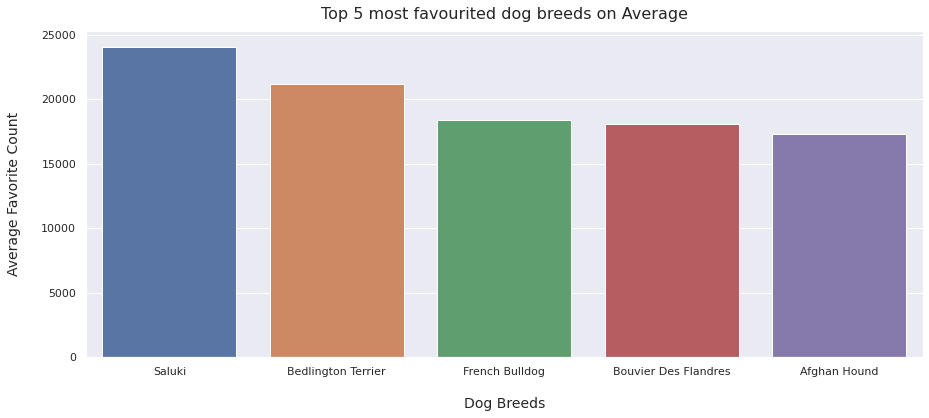

In [211]:
# Size of chart
plt.figure(figsize = (15,6))

sns.barplot(x = 'breed', y = 'count', data = mean_favorite_by_breed)

plt.title('Top 5 most favourited dog breeds on Average', fontsize = 16 , pad = 12)
plt.xlabel('Dog Breeds', fontsize = 14, labelpad=20)
plt.ylabel('Average Favorite Count', fontsize = 14, labelpad=20)


plt.show();

It appears the top 5 breeds by Average favorite count are
<ol>

  <b><li> Saluki</li>               
  <li>Bedlington Terrier</li>      
  <li>French Bulldog</li>          
  <li>Bouvier Des Flandres</li>   
  <li>Afghan Hound </li> </b>

</ol>

## Q2: Which dog stage has the highest retweet count on average

In [193]:
mean_retweet_by_dog_stage = df.groupby('dog_stage').retweet_count.mean().sort_values(ascending=False)

mean_retweet_by_dog_stage[:1]

dog_stage
doggo,puppo    19196.0
Name: retweet_count, dtype: float64

It appears on average people retweeted dogs that are in the **'Doggo'** stage than any other dog stage

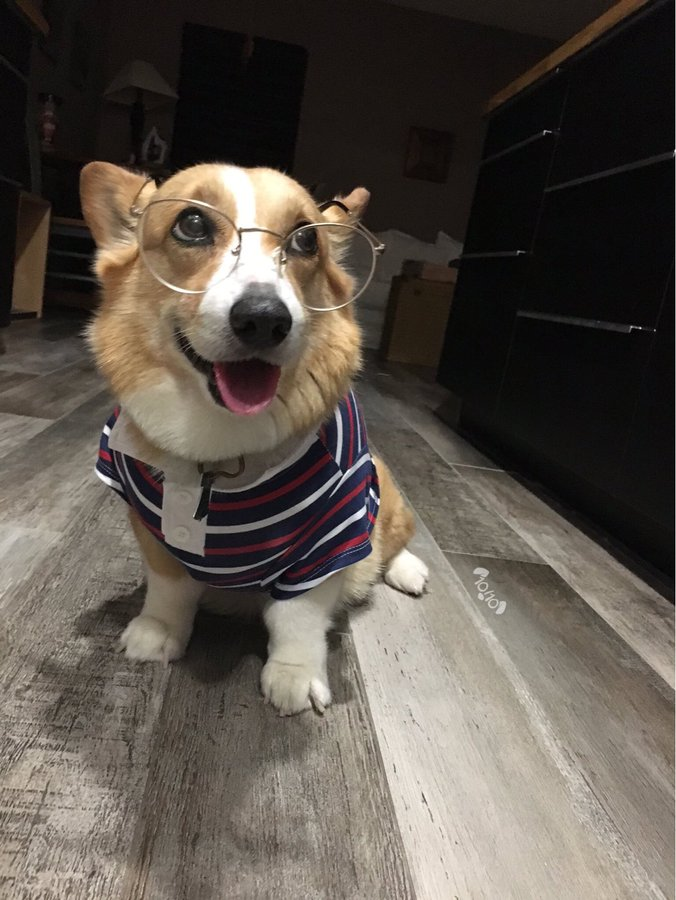

## Q3: What is the relationship between Favourite count and Retweet count

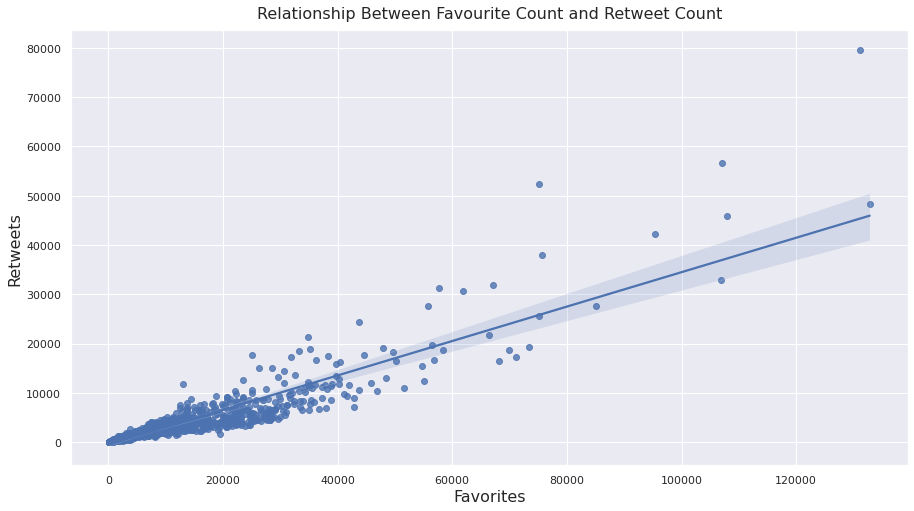

In [196]:
plt.figure(figsize = (15,8))
sns.set_theme(color_codes=True)

sns.regplot(x="favorite_count", y="retweet_count", data=df)

plt.title('Relationship Between Favourite Count and Retweet Count', fontsize = 16 , pad = 12)
plt.xlabel('Favorites', fontsize = 16, linespacing = 12)
plt.ylabel('Retweets', fontsize = 16, linespacing = 12)
plt.show()

In [195]:
p_correlation = df['favorite_count'].corr(df['retweet_count'])
print(p_correlation)

0.913283914404836


As expected, there is a strong correlation betweet favourite count and retweet. This means the more people favourite a tweet, the more likely to retweet the tweet.

## Conclusion

The datasets were quite robust but had quite a bit of missing values and a quite a bit of errors spread across the datasets which required a bit of wrangling effort.

Despite this missing values and errors, with a bit of wrangling, the dataset was robust enough to get some meaniful insights from it as done above.

## Limitations

Due to the large spread within the dataset, some of the datas may be skewed in favour of features with large spread and high standard deviations within their values

-------------------------------------------------------------

##### Downloading dataset files to local system

In [ ]:
!zip -r /content/datasets.zip /content/datasets/ 

updating: content/datasets/ (stored 0%)
updating: content/datasets/twitter_archive_master.csv (deflated 71%)
updating: content/datasets/twitter-archive-enhanced.csv (deflated 77%)
updating: content/datasets/tweet-json.txt (deflated 94%)
updating: content/datasets/wiki_List_of_dog_breeds.html (deflated 84%)
updating: content/datasets/image_predictions.tsv (deflated 69%)


In [ ]:
from google.colab import files
files.download("/content/datasets.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>